## Clickbait headline analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import datetime as dt
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize


In [2]:
abc = pd.read_csv('raw_data/abcnews-date-text.csv') #reputable news

In [3]:
exm = pd.read_csv('raw_data/examiner-date-text.csv') #clickbait

### Changing data types

In [4]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226258 entries, 0 to 1226257
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1226258 non-null  int64 
 1   headline_text  1226258 non-null  object
dtypes: int64(1), object(1)
memory usage: 18.7+ MB


In [5]:
exm.head()

,publish_date,headline_text
0,20100101,100 Most Anticipated books releasing in 2010
1,20100101,10 best films of 2009 - What's on your list?
2,20100101,10 days of free admission at Lan Su Chinese Ga...
3,20100101,10 PlayStation games to watch out for in 2010
4,20100101,10 resolutions for a Happy New Year for you an...


In [6]:
def change_dtype(df, column, new_dtype): #changes data type for df columns
    if df[column].dtype == new_dtype:
        print("Current dtype is the same as", new_dtype)
    elif new_dtype == 'datetime64[ns]':
        df[column] = pd.to_datetime(df[column], format='%Y%m%d')
        return(df)
    else:
        df[column] = df[column].astype(new_dtype)
        return(df)
        

In [7]:
change_dtype(abc,'publish_date','datetime64[ns]' )

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers
...,...,...
1226253,2020-12-31,what abc readers learned from 2020 looking bac...
1226254,2020-12-31,what are the south african and uk variants of ...
1226255,2020-12-31,what victorias coronavirus restrictions mean f...
1226256,2020-12-31,whats life like as an american doctor during c...


In [8]:
change_dtype(abc,'headline_text','str' )

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers
...,...,...
1226253,2020-12-31,what abc readers learned from 2020 looking bac...
1226254,2020-12-31,what are the south african and uk variants of ...
1226255,2020-12-31,what victorias coronavirus restrictions mean f...
1226256,2020-12-31,whats life like as an american doctor during c...


In [9]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226258 entries, 0 to 1226257
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   publish_date   1226258 non-null  datetime64[ns]
 1   headline_text  1226258 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 18.7+ MB


In [10]:
change_dtype(exm, 'publish_date', 'datetime64[ns]')
change_dtype(exm, 'headline_text', str)

,publish_date,headline_text
0,2010-01-01,100 Most Anticipated books releasing in 2010
1,2010-01-01,10 best films of 2009 - What's on your list?
2,2010-01-01,10 days of free admission at Lan Su Chinese Ga...
3,2010-01-01,10 PlayStation games to watch out for in 2010
4,2010-01-01,10 resolutions for a Happy New Year for you an...
...,...,...
3089776,2015-12-31,"Which is better investment, Lego bricks or gol..."
3089777,2015-12-31,Wild score three unanswered goals to defeat th...
3089778,2015-12-31,"With NASA and Russia on the sidelines, Europe ..."
3089779,2015-12-31,"Wolf Pack battling opponents, officials on the..."


In [11]:
exm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3089781 entries, 0 to 3089780
Data columns (total 2 columns):
 #   Column         Dtype         
---  ------         -----         
 0   publish_date   datetime64[ns]
 1   headline_text  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 47.1+ MB


In [12]:
abc.isna().any()

publish_date     False
headline_text    False
dtype: bool

In [13]:
exm.isna().any()

publish_date     False
headline_text    False
dtype: bool

## Joining dfs together

In [14]:
#adding new column to identify clickbait or not
abc['clickbait'] = 0
exm['clickbait'] = 1

In [15]:
abc.tail()

,publish_date,headline_text,clickbait
1226253,2020-12-31,what abc readers learned from 2020 looking bac...,0
1226254,2020-12-31,what are the south african and uk variants of ...,0
1226255,2020-12-31,what victorias coronavirus restrictions mean f...,0
1226256,2020-12-31,whats life like as an american doctor during c...,0
1226257,2020-12-31,womens shed canberra reskilling unemployed pan...,0


In [16]:
exm.tail()

,publish_date,headline_text,clickbait
3089776,2015-12-31,"Which is better investment, Lego bricks or gol...",1
3089777,2015-12-31,Wild score three unanswered goals to defeat th...,1
3089778,2015-12-31,"With NASA and Russia on the sidelines, Europe ...",1
3089779,2015-12-31,"Wolf Pack battling opponents, officials on the...",1
3089780,2015-12-31,Writespace hosts all genre open mic night,1


In [17]:
#selecting only the years both dfs have in common
print(exm['publish_date'].min(), exm['publish_date'].max(), exm.shape)
low = exm['publish_date'].min()
high = exm['publish_date'].max()

abc = abc.loc[(abc['publish_date']>=low) & (abc['publish_date']<=high)]
print(abc['publish_date'].min(), abc['publish_date'].max(), abc.shape)

2010-01-01 00:00:00 2015-12-31 00:00:00 (3089781, 3)
2010-01-01 00:00:00 2015-12-31 00:00:00 (492466, 3)


In [18]:
#use concat to combine the two df
df = pd.concat([abc, exm], ignore_index=True)
df.head()

,publish_date,headline_text,clickbait
0,2010-01-01,12m degas stolen from museum,0
1,2010-01-01,17 die in bangladesh bus crash,0
2,2010-01-01,2010 to be drier after very wet 2009,0
3,2010-01-01,37 catholic workers killed worldwide,0
4,2010-01-01,600 hurt in philippine new year revelry,0


### Exploring

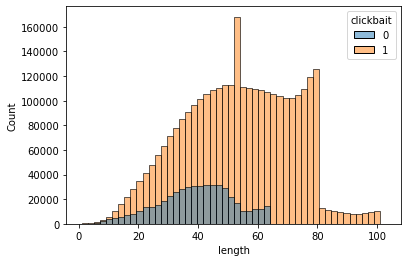

In [19]:
#comparing headline length 
# datasets are unblanced
df['length'] = df['headline_text'].str.len()
df.head()
sns.histplot(df,bins=50, x='length', hue='clickbait')

In [20]:
#why are there so many headlines that are 45-47 characters long?
df.length.value_counts()

47     71721
48     71307
49     70829
45     70688
46     70444
       ...  
101      165
3        124
102       42
2         38
103        1
Name: length, Length: 103, dtype: int64

In [21]:
#There doesn't appear to be any pattern to these headlines
df.loc[(df['length']>=45)&(df['length']<48)&(df['clickbait']==1)].tail(60)

,publish_date,headline_text,clickbait,length
3580968,2015-12-28,A Rack Room Shoes and Stein Mart shopping spree,1,47
3580981,2015-12-28,Between the lines with Elizabeth Heiter (Q&A),1,45
3581007,2015-12-28,Chris' 31 Days of Music: Day 4 - Great Peacock,1,46
3581014,2015-12-28,Confess the Son of Man before the angels of God,1,47
3581016,2015-12-28,Cooler Monday with afternoon and evening rain,1,45
3581021,2015-12-28,Dangerous ice storm for the final week of 2015,1,46
3581072,2015-12-28,Green Bay Packers find reliance in young talent,1,47
3581098,2015-12-28,Jeb Bush calls on Trump for a one on one debate,1,47
3581119,2015-12-28,"Lessons From Successful Ads, and Why Ads Fail",1,45
3581129,2015-12-28,Marvel's 'Doctor Strange' characters revealed,1,45


In [22]:
#looks like this second peak occurs around 62-79 
second_peak = df.loc[(df['length']>60)]
second_peak['length'].value_counts()


79     63485
63     63383
80     61900
61     60853
78     60351
62     59843
77     58592
64     57856
76     55565
75     53922
65     52983
74     52811
66     52609
67     52133
68     52017
73     51632
72     51319
69     51158
71     51049
70     50749
81      6699
82      6015
83      5710
84      5303
99      5238
98      5158
86      5115
85      5106
100     4904
87      4850
88      4842
97      4777
89      4555
96      4525
95      4395
94      4226
90      4138
92      4128
93      4069
91      4007
101      165
102       42
103        1
Name: length, dtype: int64

In [23]:
#Let's look the second peak around 80 characters
df.loc[(df['length']>=62)&df['length']<80].tail(30)

,publish_date,headline_text,clickbait,length
3582217,2015-12-31,These New Year's Eve signs of infidelity can e...,1,67
3582218,2015-12-31,The strongest Trump supporters are registered ...,1,54
3582219,2015-12-31,The WSJ reports the NSA spied on Israeli Prime...,1,65
3582220,2015-12-31,The Year In Review: Impressive wines and winer...,1,57
3582221,2015-12-31,The year of the eater entrepreneur,1,34
3582222,2015-12-31,'The Young and the Restless' Spoilers: Ashley ...,1,77
3582223,2015-12-31,Tips for successful achievement of New Year Re...,1,55
3582224,2015-12-31,Tonya Couch brought back to US from Mexico whi...,1,77
3582225,2015-12-31,Top 10 beers of 2015,1,20
3582226,2015-12-31,Top Carson aides resign from failing campaign,1,45


Does't look like the headlines in these peaks have anything in common

In [24]:
df.describe()

,clickbait,length
count,3.582247e+06,3.582247e+06
mean,8.625260e-01,5.165683e+01
std,3.443472e-01,1.820707e+01
min,0.000000e+00,1.000000e+00
25%,1.000000e+00,3.800000e+01
50%,1.000000e+00,5.100000e+01
75%,1.000000e+00,6.600000e+01
max,1.000000e+00,1.030000e+02


### Counting exclamations and question marks


In [25]:
df.tail(8)

,publish_date,headline_text,clickbait,length
3582239,2015-12-31,WalletHub's 16 Financial Resolutions for the N...,1,53
3582240,2015-12-31,What did we learn from the 49ers in 2015?,1,41
3582241,2015-12-31,What lies ahead for Hartford Hockey in 2016?,1,44
3582242,2015-12-31,"Which is better investment, Lego bricks or gol...",1,77
3582243,2015-12-31,Wild score three unanswered goals to defeat th...,1,53
3582244,2015-12-31,"With NASA and Russia on the sidelines, Europe ...",1,77
3582245,2015-12-31,"Wolf Pack battling opponents, officials on the...",1,51
3582246,2015-12-31,Writespace hosts all genre open mic night,1,41


In [26]:
def exclaim(headline): #Detects if a '!' is in the headline
    if '!' in headline:
        return 1
    else:
        return 0
    
df['contains_exclaim'] = df['headline_text'].apply(exclaim)
df.tail(10)

,publish_date,headline_text,clickbait,length,contains_exclaim
3582237,2015-12-31,Vaginal estrogen can improve postmenopausal se...,1,52,0
3582238,2015-12-31,Vegas fun in the 2015 Ford Mustang,1,34,0
3582239,2015-12-31,WalletHub's 16 Financial Resolutions for the N...,1,53,0
3582240,2015-12-31,What did we learn from the 49ers in 2015?,1,41,0
3582241,2015-12-31,What lies ahead for Hartford Hockey in 2016?,1,44,0
3582242,2015-12-31,"Which is better investment, Lego bricks or gol...",1,77,0
3582243,2015-12-31,Wild score three unanswered goals to defeat th...,1,53,0
3582244,2015-12-31,"With NASA and Russia on the sidelines, Europe ...",1,77,0
3582245,2015-12-31,"Wolf Pack battling opponents, officials on the...",1,51,0
3582246,2015-12-31,Writespace hosts all genre open mic night,1,41,0


In [27]:
def question(headline): #Detects if a '?' is in the headline
    if '?' in headline:
        return 1
    else:
        return 0
    
df['contains_question'] = df['headline_text'].apply(question)
df.tail(10)

,publish_date,headline_text,clickbait,length,contains_exclaim,contains_question
3582237,2015-12-31,Vaginal estrogen can improve postmenopausal se...,1,52,0,0
3582238,2015-12-31,Vegas fun in the 2015 Ford Mustang,1,34,0,0
3582239,2015-12-31,WalletHub's 16 Financial Resolutions for the N...,1,53,0,0
3582240,2015-12-31,What did we learn from the 49ers in 2015?,1,41,0,1
3582241,2015-12-31,What lies ahead for Hartford Hockey in 2016?,1,44,0,1
3582242,2015-12-31,"Which is better investment, Lego bricks or gol...",1,77,0,1
3582243,2015-12-31,Wild score three unanswered goals to defeat th...,1,53,0,0
3582244,2015-12-31,"With NASA and Russia on the sidelines, Europe ...",1,77,0,0
3582245,2015-12-31,"Wolf Pack battling opponents, officials on the...",1,51,0,0
3582246,2015-12-31,Writespace hosts all genre open mic night,1,41,0,0


### Removing punctuation and stop words

In [28]:
df["headline_text"] = df['headline_text'].str.replace('[^\w\s]','') #removing punctuation

In [29]:
df['headline_text'] = df['headline_text'].apply(lambda x: [y for y in x.lower().split()]) #splitting into words 

In [30]:
stop = stopwords.words('english')

df['no_stop'] = df['headline_text'].apply(lambda x:[y for y in x if y not in stop])

In [31]:
df.head()

,publish_date,headline_text,clickbait,length,contains_exclaim,contains_question,no_stop
0,2010-01-01,"[12m, degas, stolen, from, museum]",0,28,0,0,"[12m, degas, stolen, museum]"
1,2010-01-01,"[17, die, in, bangladesh, bus, crash]",0,30,0,0,"[17, die, bangladesh, bus, crash]"
2,2010-01-01,"[2010, to, be, drier, after, very, wet, 2009]",0,36,0,0,"[2010, drier, wet, 2009]"
3,2010-01-01,"[37, catholic, workers, killed, worldwide]",0,36,0,0,"[37, catholic, workers, killed, worldwide]"
4,2010-01-01,"[600, hurt, in, philippine, new, year, revelry]",0,39,0,0,"[600, hurt, philippine, new, year, revelry]"


Comparing the number of stop words each news site uses

[Text(0.5, 1.0, 'Number of stop words used')]

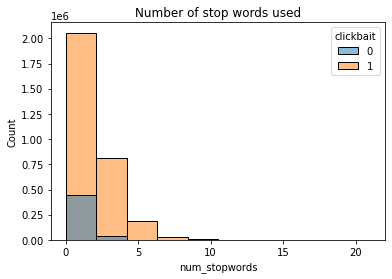

In [32]:
#finding the number of stop words
df['num_stopwords'] = (df['headline_text'].str.len())-(df['no_stop'].str.len())
sns.histplot(df,bins=10, x='num_stopwords', hue='clickbait').set(title = 'Number of stop words used')

In [33]:
df['num_stopwords'].head()

0    1
1    1
2    4
3    0
4    1
Name: num_stopwords, dtype: int64

[Text(0.5, 1.0, 'percentage of stop words used in each headline')]

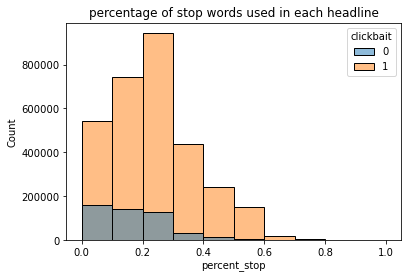

In [34]:
df['percent_stop'] = (df['num_stopwords'])/(df['headline_text'].str.len())
sns.histplot(df, bins=10, x='percent_stop', hue='clickbait').set(title='percentage of stop words used in each headline')

Looks like there isn't much difference in the amount of stop words used

In [35]:
#how many (non stop words) words are used?
df['num_words'] = df['no_stop'].str.len()

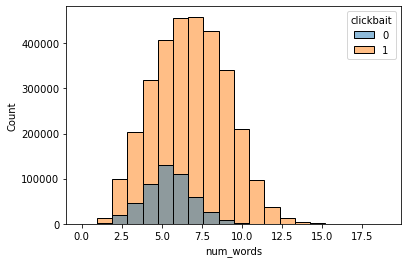

In [45]:
sns.histplot(df, x='num_words', hue='clickbait', bins=20)

### Word frequency

In [37]:
#sperarting data into clickbait and not clickbait
cb = df.loc[df['clickbait']==1]
non_cb = df.loc[df['clickbait']==0]


In [38]:
#getting word frequency counts
cb_all_headlines = []

for i in cb['no_stop']:
    cb_all_headlines += i
    
cb_wordfreq = pd.Series(cb_all_headlines).value_counts()

non_cb_all_headlines = []

for i in non_cb['no_stop']:
    non_cb_all_headlines += i
    
non_cb_wordfreq = pd.Series(non_cb_all_headlines).value_counts()


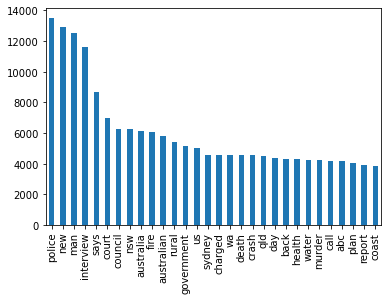

In [39]:
#plotting non-clickbait word frequencies
non_cb_wordfreq.head(30).plot(kind='bar')

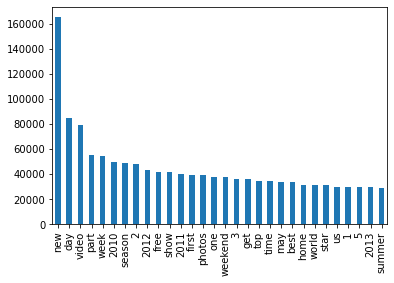

In [40]:
#plotting clickbait word frequencies
cb_wordfreq.head(30).plot(kind='bar')